# **Analise de Ações com Python**

---

Realiza a obtenção de dados históricos de preços de ações de bancos brasileiros e do índice Bovespa a partir do Yahoo Finance. Ele utiliza a biblioteca yfinance e outras ferramentas para análise de dados e visualização.


In [1]:
!pip install yfinance --upgrade --no-cache-dir
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

prices = pd.DataFrame()
tickers = ['ITUB3.SA', 'BBDC3.SA', 'BBAS3.SA', 'SANB3.SA', '^BVSP']
for i in tickers:
    data = yf.download(i, start='2008-01-01')
    if 'Adj Close' in data.columns:
        prices[i] = data['Adj Close']
    else:
        prices[i] = data['Close']


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


 5 primeiras linhas do DataFrame prices.

In [2]:
prices.head()

,ITUB3.SA,BBDC3.SA,BBAS3.SA,SANB3.SA,^BVSP
Date,,,,,
2008-01-02,5.993023,4.677737,5.274922,-31.989796,62815.0
2008-01-03,5.821792,4.620247,5.195268,-31.989796,62892.0
2008-01-04,5.821792,4.717519,5.135087,-31.989796,61037.0
2008-01-07,5.736176,4.764208,5.257226,-31.989796,60772.0
2008-01-08,5.778985,4.872173,5.365201,-31.989796,62081.0


Renomeia as colunas:

*   A função rename() é usada para alterar os nomes das colunas, tornando-os mais curtos e fáceis de identificar. Por exemplo, 'ITUB3.SA' é renomeado para 'ITUB'.

Ajuste na coluna do índice Bovespa (IBOV):

*   A linha prices['IBOV'] = prices['IBOV']/1000 divide todos os valores da coluna 'IBOV' por 1000, provavelmente para ajustar a escala dos preços do índice.

Reseta o índice:

*   A função reset_index() é usada para redefinir o índice do DataFrame, movendo o índice atual para uma coluna normal e atribuindo um novo índice sequencial (0, 1, 2, ...).

In [3]:
prices.rename(columns ={'ITUB3.SA':'ITUB', 'BBDC3.SA':'BBDC','BBAS3.SA':'BBAS','SANB3.SA':'SANB', '^BVSP':'IBOV'},inplace = True)
prices['IBOV'] = prices['IBOV']/1000
prices.reset_index(inplace = True)

Garante que não existam valores ausentes na coluna 'IBOV', prevenindo erros em análises futuras.

In [4]:
prices.dropna(subset = ['IBOV'], inplace = True)
prices.IBOV.isnull().sum()

0

Cria um gráfico de linha que mostra a variação dos preços das ações ao longo do tempo.

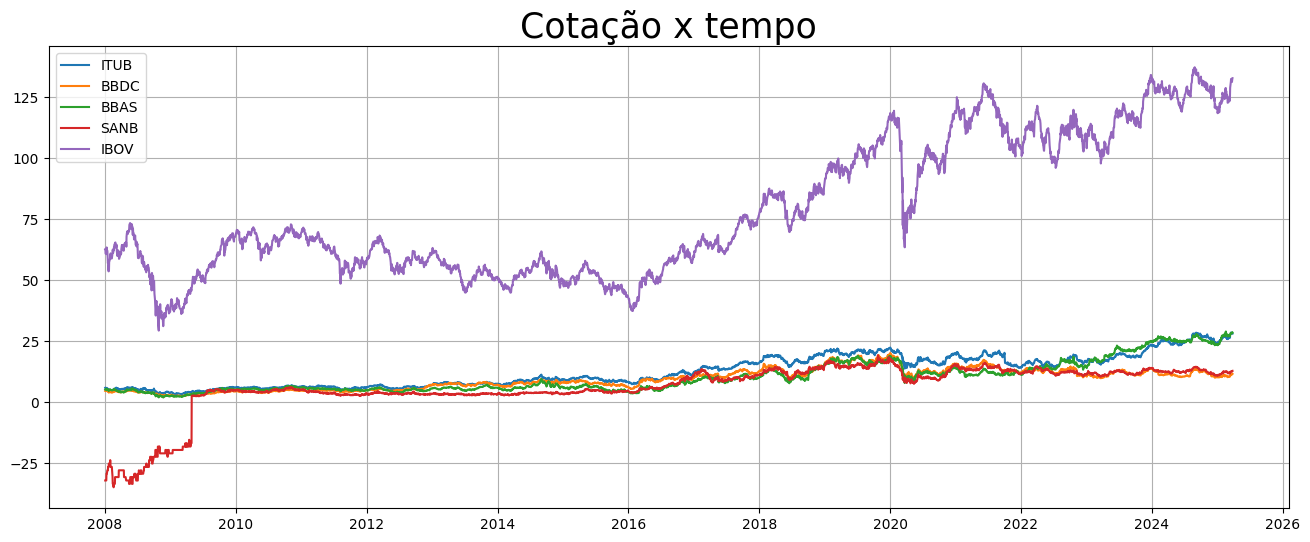

In [5]:
tickers = list(prices.drop(['Date'], axis = 1).columns)
plt.figure(figsize=(16,6))

for i in tickers:
        plt.plot(prices['Date'], prices[i])
plt.legend(tickers)
plt.grid()
plt.title("Cotação x tempo", fontsize = 25)
plt.show()

Cria um gráfico para visualizar a cotação diária e as médias móveis da ação ITUB3 (Itaú Unibanco) ao longo do tempo.

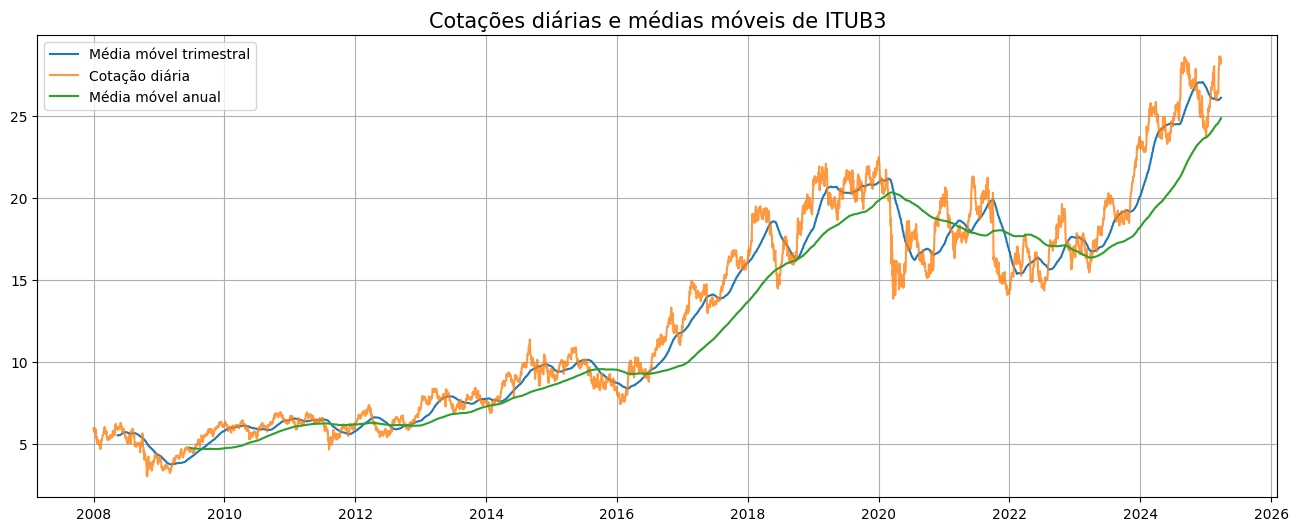

In [6]:
plt.figure(figsize=(16,6))
plt.plot(prices['Date'],prices['ITUB'].rolling(window = 90).mean())
plt.plot(prices['Date'], prices['ITUB'], alpha = 0.8)
plt.plot(prices['Date'],prices['ITUB'].rolling(window = 365).mean())
plt.grid()
plt.title('Cotações diárias e médias móveis de ITUB3', fontsize = 15)
plt.legend(['Média móvel trimestral','Cotação diária','Média móvel anual'])
plt.show()

Gera um mapa de calor (heatmap) para visualizar a correlação entre os ativos no DataFrame prices.

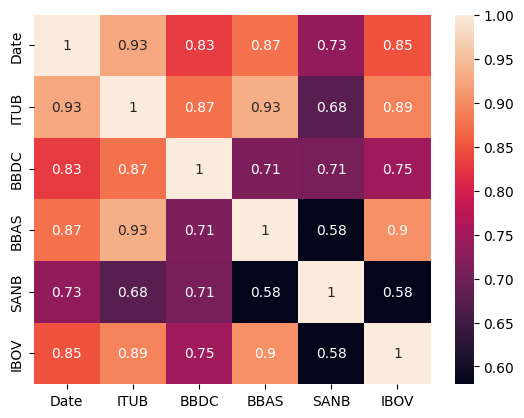

In [7]:
sns.heatmap(prices.corr(), annot = True)
plt.show()

Calcula os retornos percentuais diários dos ativos e armazena em um novo DataFrame chamado returns.

In [8]:
returns = pd.DataFrame()
for i in tickers:
    returns[i] = prices[i].pct_change()
returns['Date'] = prices['Date']

Gera um gráfico de dispersão (scatter plot) para analisar a relação entre os retornos dos ativos.

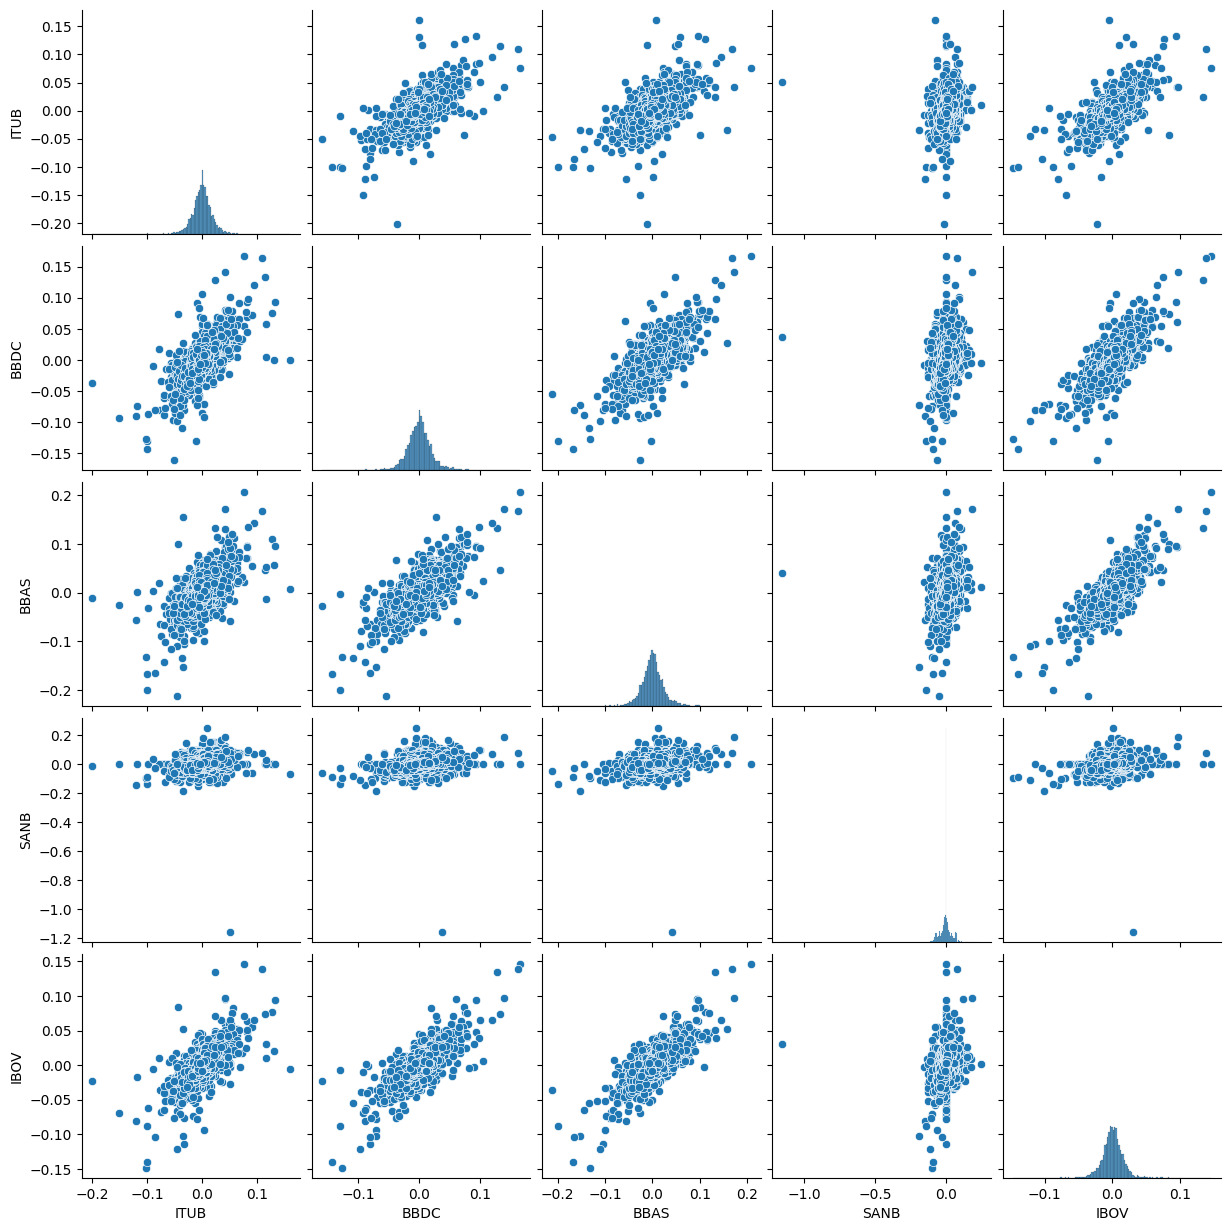

In [9]:
sns.pairplot(returns)
plt.show()

Gera estatísticas descritivas do DataFrame returns.

In [10]:
returns.describe()

,ITUB,BBDC,BBAS,SANB,IBOV,Date
count,4268.000000,4268.000000,4268.000000,4268.000000,4268.000000,4269
mean,0.000555,0.000448,0.000732,0.000544,0.000316,2016-08-17 19:00:07.589599488
min,-0.200718,-0.160126,-0.211712,-1.154367,-0.147797,2008-01-02 00:00:00
25%,-0.009504,-0.011113,-0.012563,-0.011518,-0.008108,2012-04-25 00:00:00
50%,0.000261,0.000000,0.000182,0.000000,0.000403,2016-08-18 00:00:00
75%,0.010364,0.011384,0.013234,0.012107,0.008884,2020-12-10 00:00:00
max,0.160787,0.167239,0.207143,0.250000,0.146560,2025-03-27 00:00:00
std,0.019606,0.021592,0.025907,0.038690,0.016723,NaN


Usando Seaborn para criar um histograma da distribuição dos retornos do índice IBOVESPA ('IBOV'), para ajudar a visualizar sua variabilidade e comportamento estatístico.

<Axes: xlabel='IBOV', ylabel='Density'>

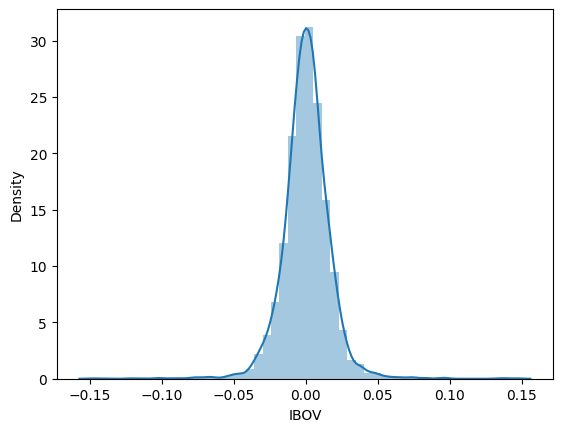

In [11]:
sns.distplot(returns['IBOV'].dropna())

Calculando e plotando a evolução dos retornos acumulados dos ativos ao longo do tempo.

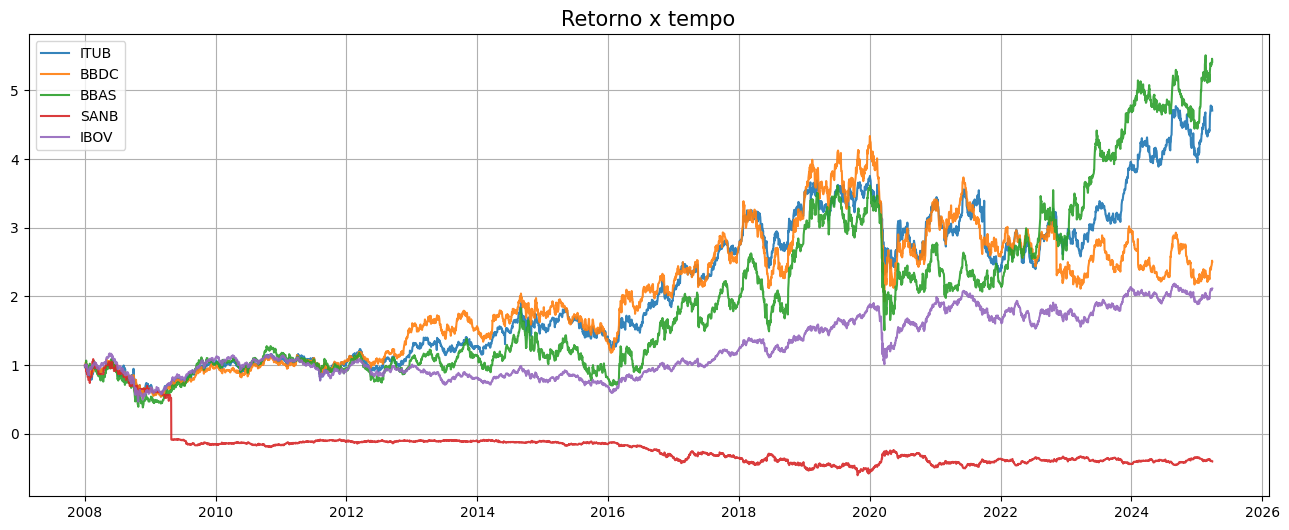

In [12]:
return_sum = pd.DataFrame()
for ticker in tickers:
    return_sum[ticker] = (returns[ticker]+1).cumprod()
return_sum['Date'] = returns['Date']

plt.figure(figsize=(16,6))
plt.plot(return_sum['Date'], return_sum.drop(['Date'], axis = 1), alpha = 0.9)
plt.legend(tickers)
plt.title("Retorno x tempo", fontsize = 15)
plt.grid()
plt.show()